<a href="https://colab.research.google.com/github/SmileCat42/Deep-Learning/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 6**

Krittaya Tantichaiyakul

6705500269

1. Code และ แสดงผลกราฟของ loss และ accuracy ตามที่เรียน
แล้วตอบคำถามต่อไปนี้ **bold text**

**1.1 หลัง vectorize แล้ว x_train.shape มีค่าเป็นอะไร**

ตอบ  (8982, 10000)

**1.2 categorical_crossentropy เหมาะกับปัญหาประเภทใด**

ตอบ เหมาะกับชุดข้อมูลที่มีคำตอบหลาย class หรือ Multi-class classification เพื่อสั่งให้โมเดลเอาคำทำนายไปเทียบกับคำตอบตอน compile เพื่อปรับน้ำหนักตามความคลาดเคลื่อนของโมเดลแต่ละตัว

**1.3 หากใช้ binary_crossentropy จะเกิดปัญหาอะไร (อธิบายเชิงแนวคิด
และรันแสดงผล)****

ตอบ  การทำเป็น binary_crossentropy จะทำให้คำทำนายของโมเดลไม่ตรงตามจุดประสงค์ เนื่องจากว่าชุดข้อมูล reuters จำเป็นต้องหาหัวข้อข่าว แล้วเฉลยของข้อมูลชุดนี้จะมีทั้งหมด 46 classes ดังนั้นเราต้องคัดเลือกเพียง 1 คำตอบ ทุกคลาสต้องไม่เป็นอิสระต่อกัน การคอมไพร์ด้วย categorical_crossentropy จะเป็นการพิจารณาความน่าจะเป็นของทุกคลาส พร้อมกันในเชิงเปรียบเทียบ เพื่อหาคำตอบที่ดีที่สุด ที่เหลือก็จะปัดเป็น 0 หมด ในขณะที่ binary_crossentropy ทุกคลาสจะเป็นอิสระต่อกัน ทำให้ผลลัพธ์เป็นค่าความน่าจะเป็นของแต่ละคลาสแยกกัน ซึ่งอาจทำให้มีหลายคลาสที่มีค่าสูงพร้อมกันและไม่สอดคล้องกับลักษณะของปัญหา

**1.4 ลองลด neuron จาก 64 → 32 ผลเปลี่ยนอย่างไร**

ตอบเอง-จะทำให้การแยกแยะความซับซ้อนฟีเจอร์ของโมเดลนั้น น้อยลง ปกติแล้วจำนวน neuron ของ hidden layer ควรมีมิติเพียงพอต่อความซับซ้อนของปัญหา output จะทำให้ข้อมูลทุกตัวถูกการคำนวณเป็นลำดับชั้น ส่งผลให้ข้อมูลสโคปเล็กลงอย่างมีประสิทธิภาพ ตรงกันข้าม หากเรากำหนดให้ neuron ในแต่ละชั้นน้อยกว่า output จะทำให้ข้อมูลถูกเอามาคำนวณได้ไม่เต็มที่ ให้นึกถึงการย่อความจาก 1000 หน้า เหลือ 1 หน้า ทำให้ข้อมูลหายไปได้มาก

AI - การลดจำนวน neuron จาก 64 เป็น 32 จะทำให้ความสามารถของโมเดลในการเรียนรู้ representation ของข้อมูลลดลง ส่งผลให้การแยกแยะหัวข้อข่าวที่มีความใกล้เคียงกันทำได้แย่ลง และมีความเสี่ยงต่อการเกิด information bottleneck มากขึ้น

แม้โมเดลจะฝึกได้เร็วขึ้นและใช้ทรัพยากรน้อยลง แต่ความแม่นยำบน validation set มักลดลงเนื่องจาก underfitting ซึ่งเปรียบได้กับการย่อข้อมูลจำนวนมากให้เหลือพื้นที่แทนข้อมูลที่เล็กเกินไป ทำให้ข้อมูลสำคัญบางส่วนสูญหาย

**1.5 ลองลด num_words จาก 10000 → 5000 ผลเปลี่ยนอย่างไร**


ตอบ ส่งผลให้การจำแนกหัวข้อข่าวที่คล้ายกันได้น้อยลง โดยเฉพาะข่าวที่มีลักษณะคล้ายกัน เช่น การศึกษา วิทยาศาสตร์ เศรษฐศาสตร์ เป็นต้น ทำให้มีโอกาสที่คำเฉพาะจะถูกทิ้งไป ส่งผลให้ข้อมูลสูญเสียรายละเอียดบางส่วน แต่ช่วยลดขนาด input และความซับซ้อนของโมเดล ทำให้เทรนเร็วขึ้นและลดโอกาสเกิด overfitting


**1.6 ถ้าใช้ sigmoid ร่วมกับ categorical_crossentropy ในชั้น output layer
จะเกิดอะไรขึ้น**

ตอบ ปกติแล้ว activation+loss ที่ถูกคู่ควรจะเป็น softmax + categorical (โจทย์นี้) และ sigmoid + binary (เช่น รีวิวข่าว) เพราะจะได้รูปแบบของคำตอบที่สอดคล้องกันทั้งคำทำนาย ผลเฉลยและรูปแบบคำตอบของปัญหา

ดังนั้น การใช้ sigmoid ร่วมกับ categorical_crossentropy ทำให้เกิดความไม่สอดคล้องระหว่าง activation และ loss function
sigmoid ทำให้แต่ละคลาสเป็นอิสระต่อกัน ในขณะที่ categorical_crossentropy สมมติว่ามีคำตอบที่ถูกเพียงหนึ่งคลาส
ส่งผลให้โมเดลเรียนรู้ได้ไม่ดี การทำนายไม่ชัดเจน และไม่ตรงกับลักษณะของปัญหา multi-class แบบ single-label

การดูว่า ข้อมูลที่ดีที่สุดคือช่วงไหนบน epoch คือดูว่า trainloss ช่วงไหนที่ต่ำ ไม่ต้องต่ำที่สุด แต่ขออยู่บนช่วงที่ใกล้ๆกัน และต้องสอดคล้องกับ valid ถ้ามีตัวที่ดิ่งลงบนช่วงเฉลี่ยของ train ที่ต่ำที่สุด ก็เลือกค่านั้น ในทางกลับกัน ถ้าเป็นกราฟของ accuracy ก็ต้องเลือกอีกแบบนึง

3

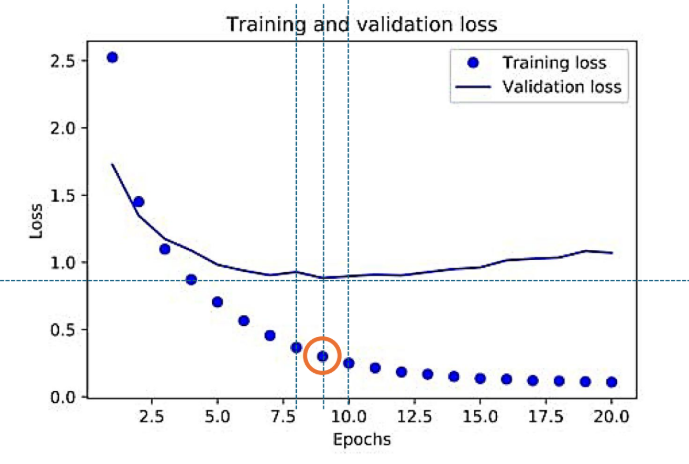

In [18]:
from keras.datasets import reuters
(train_x, train_y), (test_x, test_y) = reuters.load_data(num_words=5000)

In [19]:
print(len(train_x))
print(train_x.shape)
print(len(test_x))

print(train_x[10])
print(train_y[10])

8982
(8982,)
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


เราจะได้ชุดข้อมูลที่เป็นแบบสำเร็จรูปมาเรียบร้อย คือข้อมูลที่ถูกคัดสรรแล้วว่าอยู่ภายใน 10000(ออกบ่อย) ทั้งหมด คำไหนที่ไม่อยู่ใน 10000 คำก็จะถูกกำจัดออก  

In [20]:
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_newswire = ' '.join(reverse_word_index.get(i - 3,'?') for i in train_x[0])

In [21]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


สังเกตุได้ว่าหากแปลงเป็นคำอังกฤษ จะไม่สามารถอ่านให้เข้าใจแบบธรรมชาติได้ เพราะตอน load_data บางคำถูกตัดออกไป (คำที่ไม่ติดรอบหมื่น)

In [22]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

In [23]:
import numpy as np
x_train = vectorize_sequences(train_x)
x_test = vectorize_sequences(test_x)

print(x_train.shape)
print(x_test.shape)
print(x_train[5])

(8982, 10000)
(2246, 10000)
[0. 0. 0. ... 0. 0. 0.]


การเอา train_x เข้าฟังก์ชั่น vectorrize เพื่อแปลงข้อมูลจากเดิมที่แสดงผลเป็นค่าคงที่ ที่จัดเก็บตัวเลขของคำ เช่น 12=good 37=person เป็นต้น เข้าฟังก์ชั่นเพื่อแปลงเป็นเวกเตอร์ 01 สำหรับให้โมเดลเทรนต่อไป

In [24]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

การทำ one hot คล้ายๆกับการทำ vectorize แต่ต่างกันตรงที่ one hot ใช้กับคำเฉลยหรือ label เพื่อทำให้ชุดข้อมูลออกมาในรูปแบบของเวกเตอร์หรือถ้ารวมทั้งชุดข้อมูลก็คือ เมทริกนั่นเอง จากเดิมที label จัดเก็บคำตอบเดียวคือค่าคงที่ ว่าข่าวแต่ละชุดมีหัวข้อข่าวตรงกับอะไร ช่วง 0-46 class หากคำตอบชุดนึงเท่ากับ 3 การนำมา one hot ก็จะได้ [0,0,1,...,0] เป็นต้น

np.zero คือการสร้างเมทริก 0 แล้วเอา len label เข้ามากำหนดขนาด(แถว) แต่ละแถวก็จะมีคำตอบที่เป็นไปได้อยู่ทั้งหมด 46 ช่อง คำตอบคืออะไร ก็จะใส่ 1 บนช่องนั้น ที่เหลือ 0 ->results[i, label] = 1.

In [25]:
one_hot_train_labels = to_one_hot(train_y)
one_hot_test_labels = to_one_hot(test_y)

print(one_hot_train_labels[5])
print(one_hot_test_labels[5])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


หรือจะทำ one hot อีกวิธีนึงคือ from keras.utils.np_utils import to_categorical แต่วิธีนี้เก่าแล้ว สามารถใช้แบบนี้แทน คือ ..

In [26]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_y)
t_test = to_categorical(test_y)

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [28]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

แบ่งชุดข้อมูลออกเป็น valid กับชุดข้อมูลที่จะเทรน กำหนดให้เป็น 1000 เนื่องจากข้อมูลมีไม่มาก

In [30]:
history = model.fit(
partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.0847 - loss: 3.8185 - val_accuracy: 0.0470 - val_loss: 3.7979
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0540 - loss: 3.7922 - val_accuracy: 0.3530 - val_loss: 3.7770
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3311 - loss: 3.7721 - val_accuracy: 0.3530 - val_loss: 3.7570
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3362 - loss: 3.7517 - val_accuracy: 0.3540 - val_loss: 3.7373
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3378 - loss: 3.7319 - val_accuracy: 0.3540 - val_loss: 3.7177
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3541 - loss: 3.7125 - val_accuracy: 0.3540 - val_loss: 3.6982
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3606 - loss: 3.6928 - val_accuracy: 0.3540 - val_loss: 3.6790
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3537 - loss: 3.6733 - val_accuracy: 0.3540 - 

ถ้าไม่แบ่ง validation แล้วเทรนด้วย train_x, train_y เพียว ๆ
โมเดลจะเรียนรู้จากข้อมูลฝึกได้ดี แต่ไม่สามารถประเมินความสามารถในการ generalize ได้
ทำให้ตรวจจับ overfitting ไม่ได้ และอาจได้โมเดลที่ผลลัพธ์ดีเฉพาะกับข้อมูลฝึกเท่านั้น

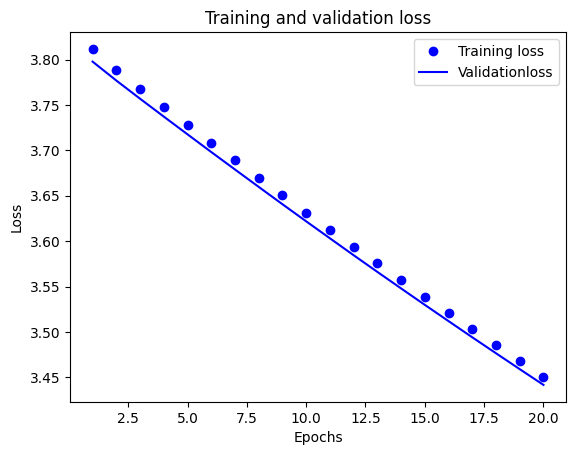

In [31]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **เพิ่มเติมจากโจทย์**

In [32]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [33]:
history = model.fit(
partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3455 - loss: 0.5863 - val_accuracy: 0.3540 - val_loss: 0.5795
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3433 - loss: 0.5777 - val_accuracy: 0.3540 - val_loss: 0.5726
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3467 - loss: 0.5710 - val_accuracy: 0.3540 - val_loss: 0.5660
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3501 - loss: 0.5644 - val_accuracy: 0.3540 - val_loss: 0.5595
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3514 - loss: 0.5578 - val_accuracy: 0.3540 - val_loss: 0.5531
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3570 - loss: 0.5515 - val_accuracy: 0.3540 - val_loss: 0.5467
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3505 - loss: 0.5451 - val_accuracy: 0.3540 - val_loss: 0.5404
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3554 - loss: 0.5388 - val_accuracy: 0.3540 - v